In [1]:
# Dependencies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
sns.set_style("whitegrid")

In [12]:
import matplotlib
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)

In [2]:
import shap
shap.initjs()

In [3]:
df_raw = pd.read_csv("spine_analysis.csv")

In [4]:
len(df_raw)

3315

In [5]:
df_raw.columns

Index(['actual_time', 'kyphoplasty', 'anterior', 'levels', 'discectomy',
       'fusion', 'cervical', 'thoracic', 'lumbar', 'laminectomy', 'surgery',
       'predicted_time', 'sex', 'bmi', 'asa', 'surgeon_id'],
      dtype='object')

In [6]:
df = df_raw.copy()
df = df.dropna()
df = df.apply(lambda x: x.astype(str).str.lower())

for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("Number of different values:")
    print(len(df[i].unique()))
    print()
    print()
    print()

actual_time
622    27
592    21
429    19
366    19
270    19
       ..
624     1
54      1
857     1
471     1
500     1
Name: actual_time, Length: 567, dtype: int64
Number of different values:
567



kyphoplasty
0    2828
1     361
Name: kyphoplasty, dtype: int64
Number of different values:
2



anterior
0    2503
1     686
Name: anterior, dtype: int64
Number of different values:
2



levels
2    1003
1     989
3     583
4     434
5     167
6      11
7       2
Name: levels, dtype: int64
Number of different values:
7



discectomy
0    2784
1     405
Name: discectomy, dtype: int64
Number of different values:
2



fusion
1    2446
0     743
Name: fusion, dtype: int64
Number of different values:
2



cervical
0    2640
1     549
Name: cervical, dtype: int64
Number of different values:
2



thoracic
0    2977
1     212
Name: thoracic, dtype: int64
Number of different values:
2



lumbar
1    2096
0    1093
Name: lumbar, dtype: int64
Number of different values:
2



laminectomy
0    1653


In [7]:
for i in ['kyphoplasty', 'anterior', 'levels', 'discectomy',
       'fusion', 'cervical', 'thoracic', 'lumbar', 'laminectomy', 'surgery',
        'sex', 'asa', 'surgeon_id']:
    df[i] = df[i].astype('category')

    
for i in ['surgery','sex', 'asa', 'surgeon_id']:
    df[i] = df[i].astype('category').cat.codes

for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print("Number of different values:")
    print(len(df[i].unique()))
    print()
    print()
    print()

actual_time
622    27
592    21
429    19
366    19
270    19
       ..
624     1
54      1
857     1
471     1
500     1
Name: actual_time, Length: 567, dtype: int64
Number of different values:
567



kyphoplasty
0    2828
1     361
Name: kyphoplasty, dtype: int64
Number of different values:
2



anterior
0    2503
1     686
Name: anterior, dtype: int64
Number of different values:
2



levels
2    1003
1     989
3     583
4     434
5     167
6      11
7       2
Name: levels, dtype: int64
Number of different values:
7



discectomy
0    2784
1     405
Name: discectomy, dtype: int64
Number of different values:
2



fusion
1    2446
0     743
Name: fusion, dtype: int64
Number of different values:
2



cervical
0    2640
1     549
Name: cervical, dtype: int64
Number of different values:
2



thoracic
0    2977
1     212
Name: thoracic, dtype: int64
Number of different values:
2



lumbar
1    2096
0    1093
Name: lumbar, dtype: int64
Number of different values:
2



laminectomy
0    1653


In [8]:
df['actual_time'] = df['actual_time'].astype("int64")
df

,actual_time,kyphoplasty,anterior,levels,discectomy,fusion,cervical,thoracic,lumbar,laminectomy,surgery,predicted_time,sex,bmi,asa,surgeon_id
0,32,1,0,1,0,0,0,0,0,0,18,139,0,27.96,3,2
1,58,1,0,1,0,0,0,0,0,0,18,139,1,24.42,2,2
2,31,1,0,1,0,0,0,0,0,0,18,60,1,33.37,3,1
3,64,1,0,1,0,0,0,0,0,0,18,60,0,31.51,3,2
4,174,1,0,1,0,0,0,0,0,0,18,108,1,21.82,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,428,0,0,2,0,1,0,0,1,1,30,165,1,34.06,2,2
3311,428,0,0,2,0,1,0,0,1,1,30,187,1,34.06,2,2
3312,97,0,0,1,0,0,0,0,1,1,22,120,1,44.12,3,2
3313,419,0,0,6,0,1,0,0,0,0,3,480,2,32.11,1,2


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


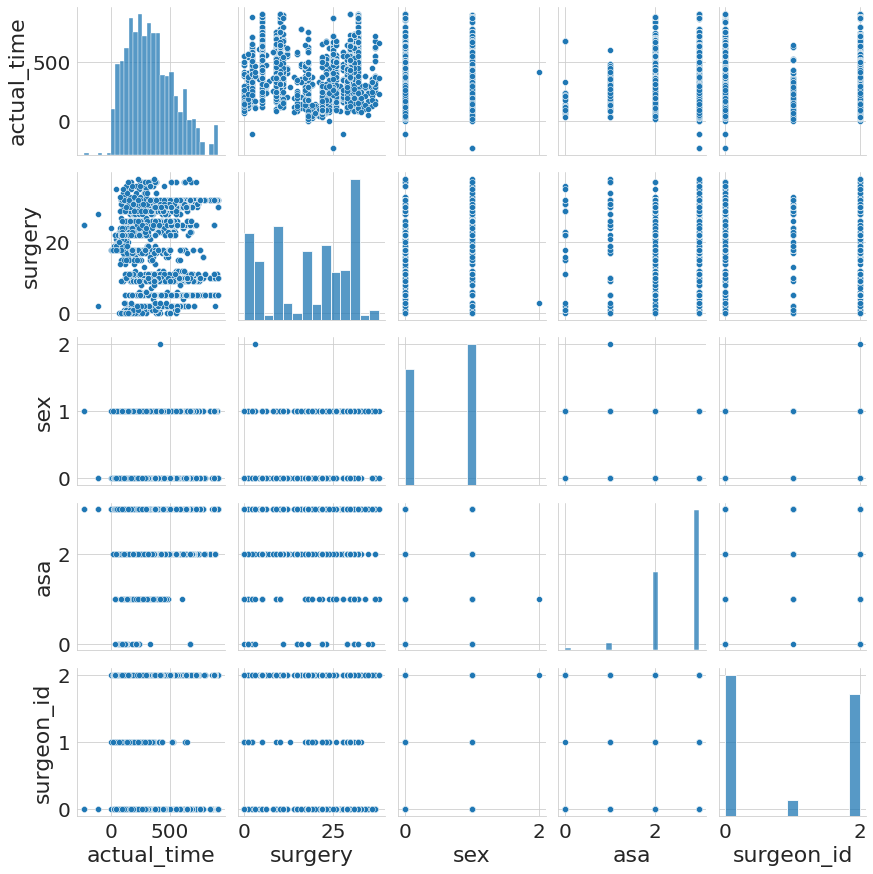

In [13]:
sns.pairplot(df)

<AxesSubplot:xlabel='fusion', ylabel='actual_time'>

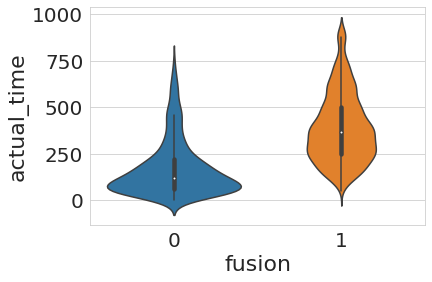

In [14]:
sns.violinplot(x="fusion", y = "actual_time", data=df[df["actual_time"]>0])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [16]:
len(df), len(df_raw) - len(df)

(3189, 126)

In [17]:
X = x = df.drop(['actual_time'], axis=1)
y = df['actual_time']
y = y.astype("int64")
x.columns

Index(['kyphoplasty', 'anterior', 'levels', 'discectomy', 'fusion', 'cervical',
       'thoracic', 'lumbar', 'laminectomy', 'surgery', 'predicted_time', 'sex',
       'bmi', 'asa', 'surgeon_id'],
      dtype='object')

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
# x_train = scaler.fit_transform(x_train.drop("predicted_time" , axis=1))
x_train= x_train.astype("float64")
og_pred = x_test["predicted_time"] 
# x_test = scaler.transform(x_test.drop("predicted_time", axis=1))
x_test = x_test.drop(['predicted_time'], axis=1)
x_test = x_test.astype("float64")
X=x= X.drop(['predicted_time'], axis=1)

In [19]:
len(y_test[y_test != og_pred])

319

In [20]:
df = df[df["actual_time"].astype("int64") >= 0]

In [21]:
df = df.reset_index(drop=True)

In [22]:
df

,actual_time,kyphoplasty,anterior,levels,discectomy,fusion,cervical,thoracic,lumbar,laminectomy,surgery,predicted_time,sex,bmi,asa,surgeon_id
0,32,1,0,1,0,0,0,0,0,0,18,139,0,27.96,3,2
1,58,1,0,1,0,0,0,0,0,0,18,139,1,24.42,2,2
2,31,1,0,1,0,0,0,0,0,0,18,60,1,33.37,3,1
3,64,1,0,1,0,0,0,0,0,0,18,60,0,31.51,3,2
4,174,1,0,1,0,0,0,0,0,0,18,108,1,21.82,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,428,0,0,2,0,1,0,0,1,1,30,165,1,34.06,2,2
3181,428,0,0,2,0,1,0,0,1,1,30,187,1,34.06,2,2
3182,97,0,0,1,0,0,0,0,1,1,22,120,1,44.12,3,2
3183,419,0,0,6,0,1,0,0,0,0,3,480,2,32.11,1,2


<Figure size 576x576 with 0 Axes>

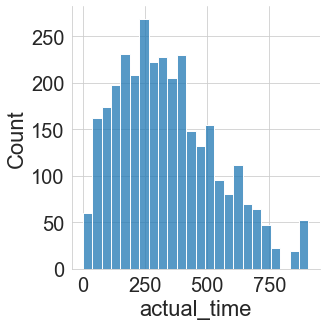

In [32]:
plt.figure(figsize=(8,8))
sns.displot(df["actual_time"], kind="hist")
plt.title("Prediction Error for Currently Used Method")
# plt.savefig("Histogram.jpg", dpi=1000, bbox_inches="tight")

In [24]:
df["actual_time"].value_counts(bins=2)

(-0.908, 453.5]    2337
(453.5, 907.0]      848
Name: actual_time, dtype: int64

In [25]:
X = x = df.drop(['actual_time'], axis=1)
y = df['actual_time']
y = y.astype("int64")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
x_train = x_train.drop("predicted_time" , axis=1)
og_pred = x_test["predicted_time"] 
x_test = x_test.drop("predicted_time", axis=1)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
x_train = x_train.drop("predicted_time" , axis=1)
og_pred = x_test["predicted_time"] 
x_test = x_test.drop("predicted_time", axis=1)

In [27]:
sns.set_style("whitegrid")

In [92]:
# from yellowbrick.regressor import PredictionError
# from sklearn.linear_model import LinearRegression

# visualizer = PredictionError(LinearRegression(normalize=True))
# visualizer.fit(x_train.astype("float64"), y_train.astype("float64"))
# visualizer.score(x_test.astype("float64"), y_test.astype("float64"))
# plt.xlim((0,900))
# plt.ylim(0,900)
# visualizer.show("LinearRegression.jpg", dpi=1000, bbox_inches="tight")

In [ ]:
# 'explained_variance':explained_variance_score(y_test, y_pred),
# "max_error":max_error(y_test, y_pred),
# "mean_absolute_error":mean_absolute_error(y_test, y_pred),
# 'RMSE':mean_squared_error(y_test, y_pred, squared=False),
# "r2": r2_score(y_test, y_pred)}

Accuracy: 43.11 %.
R2 -0.5734438686313927
Explained Variance 0.0123049573483901
Max Error 847.0
MAE 180.32339089481945
RMSE 243.3079590793001


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


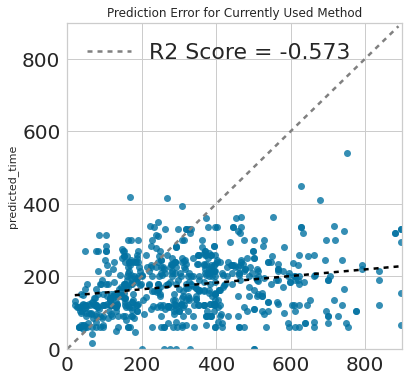

In [147]:
X = x = df.drop(['actual_time'], axis=1)
y = df['actual_time']
y = y.astype("int64")
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True, test_size=0.2, random_state=101)
x_train = x_train.drop("predicted_time" , axis=1)
og_pred = x_test["predicted_time"] 
X = x = x.drop("predicted_time", axis=1)

errors = abs(og_pred.astype("int64") - y_test)

mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

print(f"R2 {r2_score(y_test, og_pred)}")
print(f"Explained Variance {explained_variance_score(y_test, og_pred)}")
# print(r2_score(df["actual_time"], df["predicted_time"]))
# print(explained_variance_score(df["actual_time"], df["predicted_time"]))
print(f"Max Error {max_error(y_test, og_pred)}")
print(f"MAE {mean_absolute_error(y_test, og_pred)}")
print(f"RMSE {mean_squared_error(y_test, og_pred, squared=False)}")
plt.figure(figsize=(6,6))
plt.xlim((0,900))
plt.ylim(0,900)
sns.lineplot(range(0,900,10),range(0,900,10),  style=True, dashes=[(2,2)], color='grey', linewidth=2.5, legend=False )

sns.regplot(x = y_test.values.astype("int64"), y = og_pred.astype("int64"), ci=0, line_kws={'dashes':(2,2), 'color':'black', "linewidth":2.5} )
plt.legend(["R2 Score = " + str(round(r2_score(y_test, og_pred), 3))], fontsize= "medium")
plt.title("Prediction Error for Currently Used Method")

plt.savefig("OG.jpg", dpi=1000, bbox_inches="tight")


In [26]:
# rfc=RandomForestRegressor(random_state=101, n_jobs=-1)

# param_grid = { 
#     'n_estimators': [200, 500, 1000],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,6,8],
#     'criterion' :['squared_error', 'poisson', "absolute_error"]
# }
# CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, n_jobs=-1)
# CV_rfc.fit(x, y)
# CV_rfc.best_params_

In [27]:
"""{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 1000}"""

"{'criterion': 'squared_error',\n 'max_depth': 8,\n 'max_features': 'log2',\n 'n_estimators': 1000}"

# Clustering try 1

In [28]:
X = X.dropna().astype("float64")

In [29]:
X.dropna()

,kyphoplasty,anterior,levels,discectomy,fusion,cervical,thoracic,lumbar,laminectomy,surgery,predicted_time,sex,bmi,asa,surgeon_id
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,139.0,0.0,27.96,3.0,2.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,139.0,1.0,24.42,2.0,2.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,60.0,1.0,33.37,3.0,1.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,60.0,0.0,31.51,3.0,2.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,108.0,1.0,21.82,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,165.0,1.0,34.06,2.0,2.0
3181,0.0,0.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,30.0,187.0,1.0,34.06,2.0,2.0
3182,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,22.0,120.0,1.0,44.12,3.0,2.0
3183,0.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,480.0,2.0,32.11,1.0,2.0


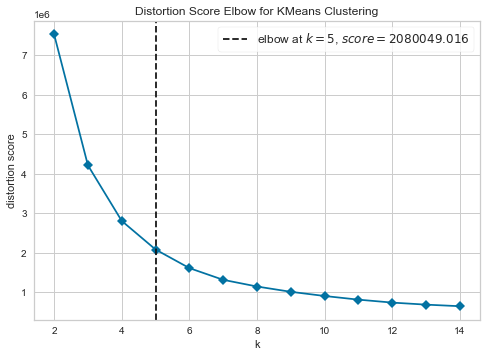

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15), timings=False)
visualizer.fit(X.dropna().astype("float64"))        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


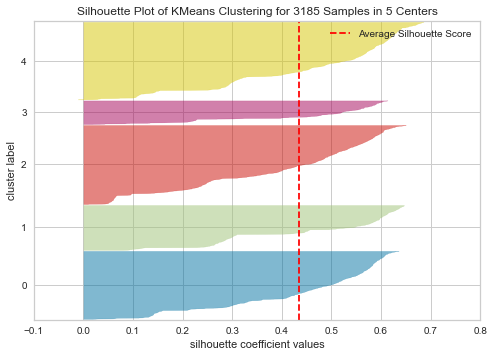

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3185 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [31]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

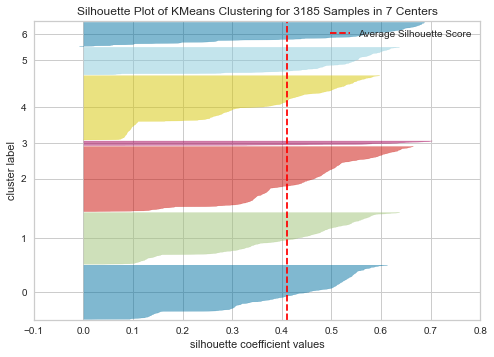

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 3185 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [32]:
from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(7, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

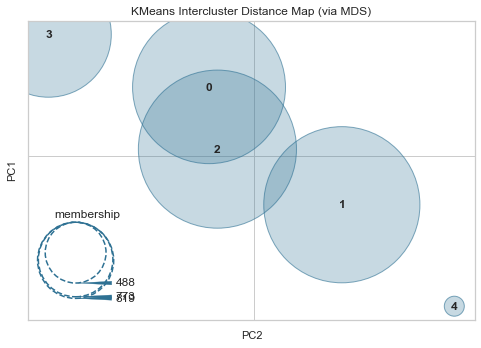

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [33]:
from yellowbrick.cluster import InterclusterDistance

model = KMeans(5)
visualizer = InterclusterDistance(model, random_state=0)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:>

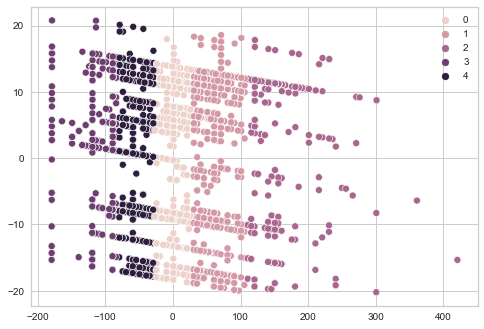

In [34]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2) 
pca.fit(X) 
X_pca=pca.transform(X)
ex_variance=np.var(X_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
ex_variance_ratio 
Xax=X_pca[:,0]
Yax=X_pca[:,1]


model = KMeans(n_clusters=5)
# fit X
model.fit(X)
# predict labels 
y_pred = model.predict(X)


sns.scatterplot(Xax,Yax, hue=y_pred)


In [59]:
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor, StackingRegressor , VotingRegressor

# K Fold

In [60]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, shuffle=True, random_state=101)

In [61]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, criterion="mse", random_state= 101, n_jobs=-1)

from sklearn.ensemble import BaggingRegressor
bbg = BaggingRegressor(n_estimators = 1000, random_state= 101, n_jobs=-1, bootstrap=True)


from xgboost import XGBRegressor,plot_importance
xgb = XGBRegressor(n_estimators=1000, random_state= 101, n_jobs=-1)


models = [lr,bbg,rf,xgb]

# a = []
# for i in models:
#     a.append(str(i).split("(")[0])

# scoring=['explained_variance',"max_error","neg_mean_absolute_error",
#         'neg_root_mean_squared_error', "r2"]
# aaa = np.zeros((len(scoring),len(a)))
# df_with_smote = pd.DataFrame(aaa,columns= a, index = scoring )

# for i in models:
#     for j in scoring:
#         scores = np.average(cross_val_score(i, x.astype("float32"), y.astype("float32").values, cv=cv ,scoring=j , n_jobs=-1))
#         df_with_smote[str(i).split("(")[0]][j] = np.round(scores.astype("float32"), decimals=3)

In [38]:
# pd.options.display.float_format = "{:,.4f}".format
# # df_with_smote.T.to_csv("Scores.csv")
# pd.DataFrame(aaa,columns= a, index = scoring).T

In [58]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error, mean_squared_error

In [67]:
X = x = df.drop(['actual_time', 'predicted_time'], axis=1)
y = df['actual_time']
y = y.astype("int64")

In [68]:
score_dic = pd.DataFrame(columns=["Model", "Shap_Values","test_index","X_test", "y_test", "y_pred",
                                  'explained_variance',"max_error",
                                  "mean_absolute_error",
                                  "RMSE",
                                  "r2"])

In [69]:
list_shap_values = list()
list_test_sets = list()
list_pred_values = list()
list_pred_values = list()
for i in models:
    list_shap_values = list()
    list_test_sets = list()
    list_pred_values = list()
    list_pred_values = list()
    for train_index, test_index in cv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        X_train = pd.DataFrame(X_train,columns=X_train.columns)
        X_test = pd.DataFrame(X_test,columns=X_test.columns)

        i.fit(X_train.astype("float32"), y_train)
                
        try:
            explainer = shap.TreeExplainer(i)
            shap_values = explainer.shap_values(X_test.astype("float32"))
            list_shap_values.append(shap_values)
        except:
            list_shap_values.append(False)
            print((str(i).split("(")[0]))
        
        y_pred = i.predict(X_test.astype("float32"))
            
        new_row = { "Model":(str(i).split("(")[0]),
        "Shap_Values":list_shap_values,
        "test_index":test_index,
        "X_test":X_test, 
        "y_test":y_test, 
        "y_pred":y_pred,
        'explained_variance':explained_variance_score(y_test, y_pred),
        "max_error":max_error(y_test, y_pred),
        "mean_absolute_error":mean_absolute_error(y_test, y_pred),
        'RMSE':mean_squared_error(y_test, y_pred, squared=False),
        "r2": r2_score(y_test, y_pred)}
        list_test_sets.append(test_index)
        list_pred_values.append(i.predict(X_test.astype("float32")))
        score_dic = score_dic.append(new_row,ignore_index=True)

LinearRegression
LinearRegression
LinearRegression
LinearRegression
LinearRegression
LinearRegression
LinearRegression
LinearRegression
LinearRegression
LinearRegression
BaggingRegressor
BaggingRegressor
BaggingRegressor
BaggingRegressor
BaggingRegressor
BaggingRegressor
BaggingRegressor
BaggingRegressor
BaggingRegressor
BaggingRegressor


In [70]:
score_dic[["Model", "explained_variance", "max_error", "mean_absolute_error", "RMSE", "r2"]]

,Model,explained_variance,max_error,mean_absolute_error,RMSE,r2
0,LinearRegression,0.356284,595.162292,116.058747,150.688614,0.349458
1,LinearRegression,0.375404,437.158386,123.255307,159.059425,0.373357
2,LinearRegression,0.268545,499.890503,118.892062,154.647679,0.263859
3,LinearRegression,0.280277,551.604797,128.699365,166.392997,0.279664
4,LinearRegression,0.322281,550.058685,130.052982,164.466974,0.316385
5,LinearRegression,0.406757,507.364532,122.967886,161.221010,0.406755
6,LinearRegression,0.366746,476.677032,128.308090,167.626871,0.361774
7,LinearRegression,0.298839,545.229752,131.841695,167.486910,0.298378
8,LinearRegression,0.334185,475.117935,126.131576,159.276270,0.331879
9,LinearRegression,0.367272,595.707428,129.365232,168.293410,0.360678


In [71]:
score_dic[["Model", "explained_variance", "max_error", "mean_absolute_error", "RMSE", "r2"]].groupby("Model").median()

,explained_variance,max_error,mean_absolute_error,RMSE,r2
Model,,,,,
BaggingRegressor,0.769005,454.900500,62.835556,96.511803,0.763979
LinearRegression,0.345235,526.297142,127.219833,162.843992,0.340668
RandomForestRegressor,0.768969,454.590500,62.822910,96.516502,0.763966
XGBRegressor,0.778756,475.725616,44.315738,92.950637,0.770592


In [72]:
# score_dic.to_csv("score_dic_everything.csv")

In [73]:
# score_dic[["Model", "explained_variance", "max_error", "mean_absolute_error", "RMSE", "r2"]].to_csv("All Folds Scores2.csv")

In [74]:
# score_dic[["Model", "explained_variance", "max_error", "mean_absolute_error", "RMSE", "r2"]].groupby("Model").median().to_csv("Median Scores2.csv")

Accuracy: 100.0 %.
-0.9558457684934409
25990.90251572327


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
invalid value encountered in true_divide
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Accuracy: nan %.
0.750142511938706
8277.698113207547


invalid value encountered in true_divide
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


Accuracy: nan %.
0.7505281751437948
8266.191823899371
Accuracy: 100.0 %.
0.8192240202526702
6627.639498432602


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


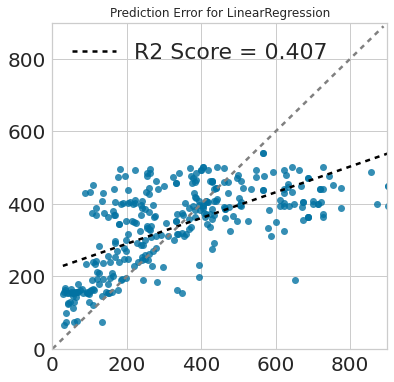

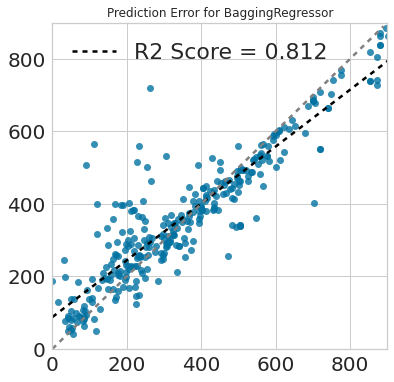

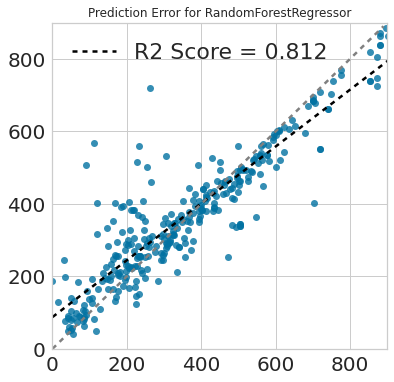

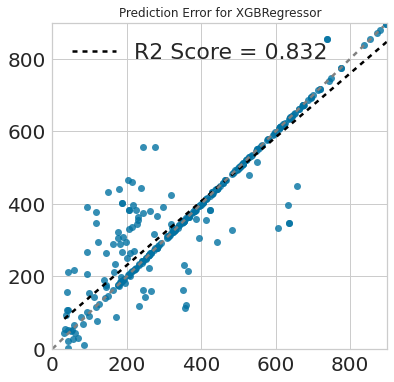

In [96]:
import matplotlib
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)

for model in score_dic["Model"].unique():
    y_test = score_dic[score_dic["Model"] == model].sort_values("r2", ascending=False).iloc[0]["y_test"].values
    pred_y = score_dic[score_dic["Model"] == model].sort_values("r2", ascending=False).iloc[0]["y_pred"]
    r2 = score_dic[score_dic["Model"] == model].sort_values("r2", ascending=False).iloc[0]["r2"]
    errors = abs(y_test.astype("int64") - y_test)

    mape = 100 * (errors / y_test)
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')
    print(r2_score(pred_y, y_test))
    print(mean_squared_error(y_test, pred_y.astype("int64")))
    plt.figure(figsize=(6,6))
    plt.xlim((0,900))
    plt.ylim(0,900)
    sns.regplot(x = y_test.astype("int64"), y = pred_y.astype("int64"), ci=0, line_kws={'dashes':(2,2), 'color':'black', "linewidth":2.5} )
    sns.lineplot(range(0,900,10), range(0,900,10), style=True, dashes=[(2,2)], color='grey', linewidth=2.5, legend=False )
    plt.legend(["R2 Score = " + str(round(r2, 3))], fontsize= "medium")
    plt.title("Prediction Error for " + str(model))

    plt.savefig(str(model) + " Best in KFold.jpg", dpi=1000, bbox_inches="tight")
    


In [76]:
score_dic["Model"].value_counts()

LinearRegression         10
BaggingRegressor         10
RandomForestRegressor    10
XGBRegressor             10
Name: Model, dtype: int64

In [77]:
score_dic["Fold"] = list(range(0,10)) * score_dic["Model"].nunique()

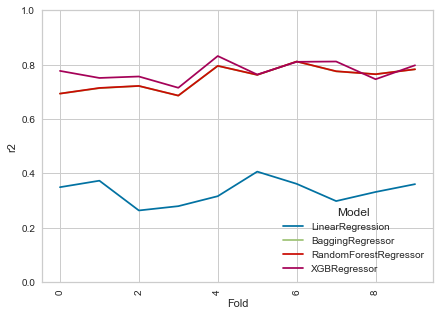

In [78]:
plt.figure(figsize=(7,5))
sns.lineplot(data=score_dic, x="Fold", y="r2", hue="Model")
plt.xticks(rotation=90)
plt.ylim((0,1))
plt.show()


In [109]:
# score_dic = pd.read_csv("All Folds Scores.csv", index_col="Unnamed: 0")
# score_dic

In [80]:
sns.set_style("whitegrid")

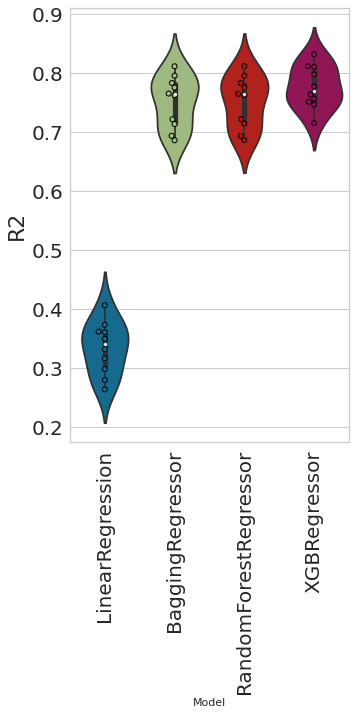

In [108]:
import matplotlib
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)

plt.figure(figsize=(5,8))
sns.swarmplot(data=score_dic, x="Model", y="r2", edgecolor='black', linewidth=1)
sns.violinplot(data=score_dic, x="Model", y="r2")
plt.ylabel('R2', fontsize=22)

plt.xticks(rotation=90)
plt.savefig("R2_10Fold_Violin.jpg", dpi=1000, bbox_inches="tight")

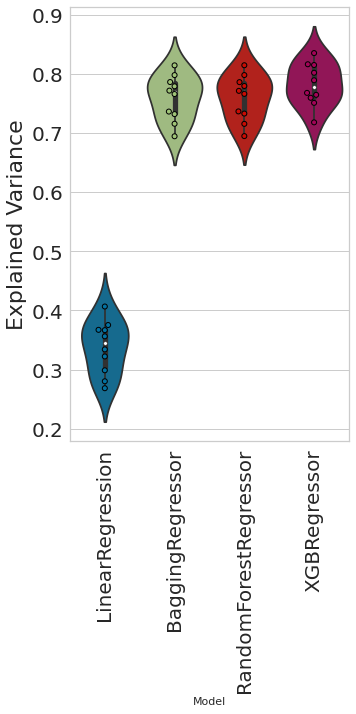

In [106]:
plt.figure(figsize=(5,8))
sns.violinplot(data=score_dic, x="Model", y="explained_variance")
sns.swarmplot(data=score_dic, x="Model", y="explained_variance", edgecolor='black', linewidth=1)
plt.ylabel('Explained Variance', fontsize=22)
plt.xticks(rotation=90)
plt.savefig("Explained_Variance_10Fold_Violin.jpg", dpi=1000, bbox_inches="tight")

In [57]:
import shap
shap.initjs()

In [58]:
X

,kyphoplasty,anterior,levels,discectomy,fusion,cervical,thoracic,lumbar,laminectomy,surgery,sex,bmi,asa,surgeon_id
0,1,0,1,0,0,0,0,0,0,18,0,27.96,3,2
1,1,0,1,0,0,0,0,0,0,18,1,24.42,2,2
2,1,0,1,0,0,0,0,0,0,18,1,33.37,3,1
3,1,0,1,0,0,0,0,0,0,18,0,31.51,3,2
4,1,0,1,0,0,0,0,0,0,18,1,21.82,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3180,0,0,2,0,1,0,0,1,1,30,1,34.06,2,2
3181,0,0,2,0,1,0,0,1,1,30,1,34.06,2,2
3182,0,0,1,0,0,0,0,1,1,22,1,44.12,3,2
3183,0,0,6,0,1,0,0,0,0,3,2,32.11,1,2


In [201]:
X = x = df.drop(['actual_time', 'predicted_time'], axis=1)
y = df['actual_time']
y = y.astype("int64")

In [202]:
list_shap_values = list()
list_test_sets = list()
foldd = 1
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train = pd.DataFrame(X_train,columns=X.columns)
    X_test = pd.DataFrame(X_test,columns=X.columns)
    X_train, X_test = X_train.astype("float32"), X_test.astype("float32")
    #training model
    xgb.fit(X_train, y_train)

    #explaining model
    explainer = shap.TreeExplainer(xgb)
    shap_values = explainer.shap_values(X_test)
    shap.force_plot(explainer.expected_value, shap_values[4,:],X_train.columns )
    plt.show()
    shap.summary_plot(shap_values, X_train.columns, plot_type="bar", show=False)
    plt.savefig("XGB Bar"+str(foldd) +".jpg", dpi=1000, bbox_inches="tight")
    plt.close()
    shap.summary_plot(shap_values, X_test, show=False)
    plt.savefig("XGB Bee"+str(foldd) +".jpg", dpi=1000, bbox_inches="tight")
    plt.close()
    foldd+=1
    #for each iteration we save the test_set index and the shap_values
    list_shap_values.append(shap_values)
    list_test_sets.append(test_index)

In [216]:
def shapley_feature_ranking(shap_values, X):
    feature_order = np.argsort(np.mean(np.abs(shap_values), axis=0))
    return pd.DataFrame(
        {
            "features": [X.columns[i] for i in feature_order][::-1],
            "importance": [
                np.mean(np.abs(shap_values), axis=0)[i] for i in feature_order
            ][::-1],
        }
    )

In [217]:
X.columns

Index(['kyphoplasty', 'anterior', 'levels', 'discectomy', 'fusion', 'cervical',
       'thoracic', 'lumbar', 'laminectomy', 'surgery', 'sex', 'bmi', 'asa',
       'surgeon_id'],
      dtype='object')

In [218]:
feature_ranks = pd.DataFrame()
for i in range(len(list_shap_values)):
    feature_ranks["rank" + str(i)] = shapley_feature_ranking(list_shap_values[i],X.iloc[list_test_sets[i]])["features"]
    feature_ranks["imp" + str(i)] = shapley_feature_ranking(list_shap_values[i],X.iloc[list_test_sets[i]])["importance"]

In [219]:
# feature_ranks = pd.read_csv("feature_ranks.csv")

In [220]:
# feature_ranks.to_csv("feature_ranks.csv")

In [221]:
ranks_df = feature_ranks.loc[:, feature_ranks.columns.str.contains("rank")]

In [222]:
dd = {}
for i in range(len(ranks_df["rank" + str(0)])):
    dd[ranks_df["rank" + str(0)][i]] = []
for i in range(10):
    for j in range(len(ranks_df["rank" + str(0)])):
        dd[ranks_df["rank" + str(i)][j]].append(j+1)
dd = pd.DataFrame(dd).T
dd["Median"] = dd.median(axis=1)
dd = dd.sort_values("Median", ascending=True)


In [226]:
# pd.read_csv("rank_heatmap.csv")
# dd.to_csv("rank_heatmap.csv")
sns.set_style("whitegrid")

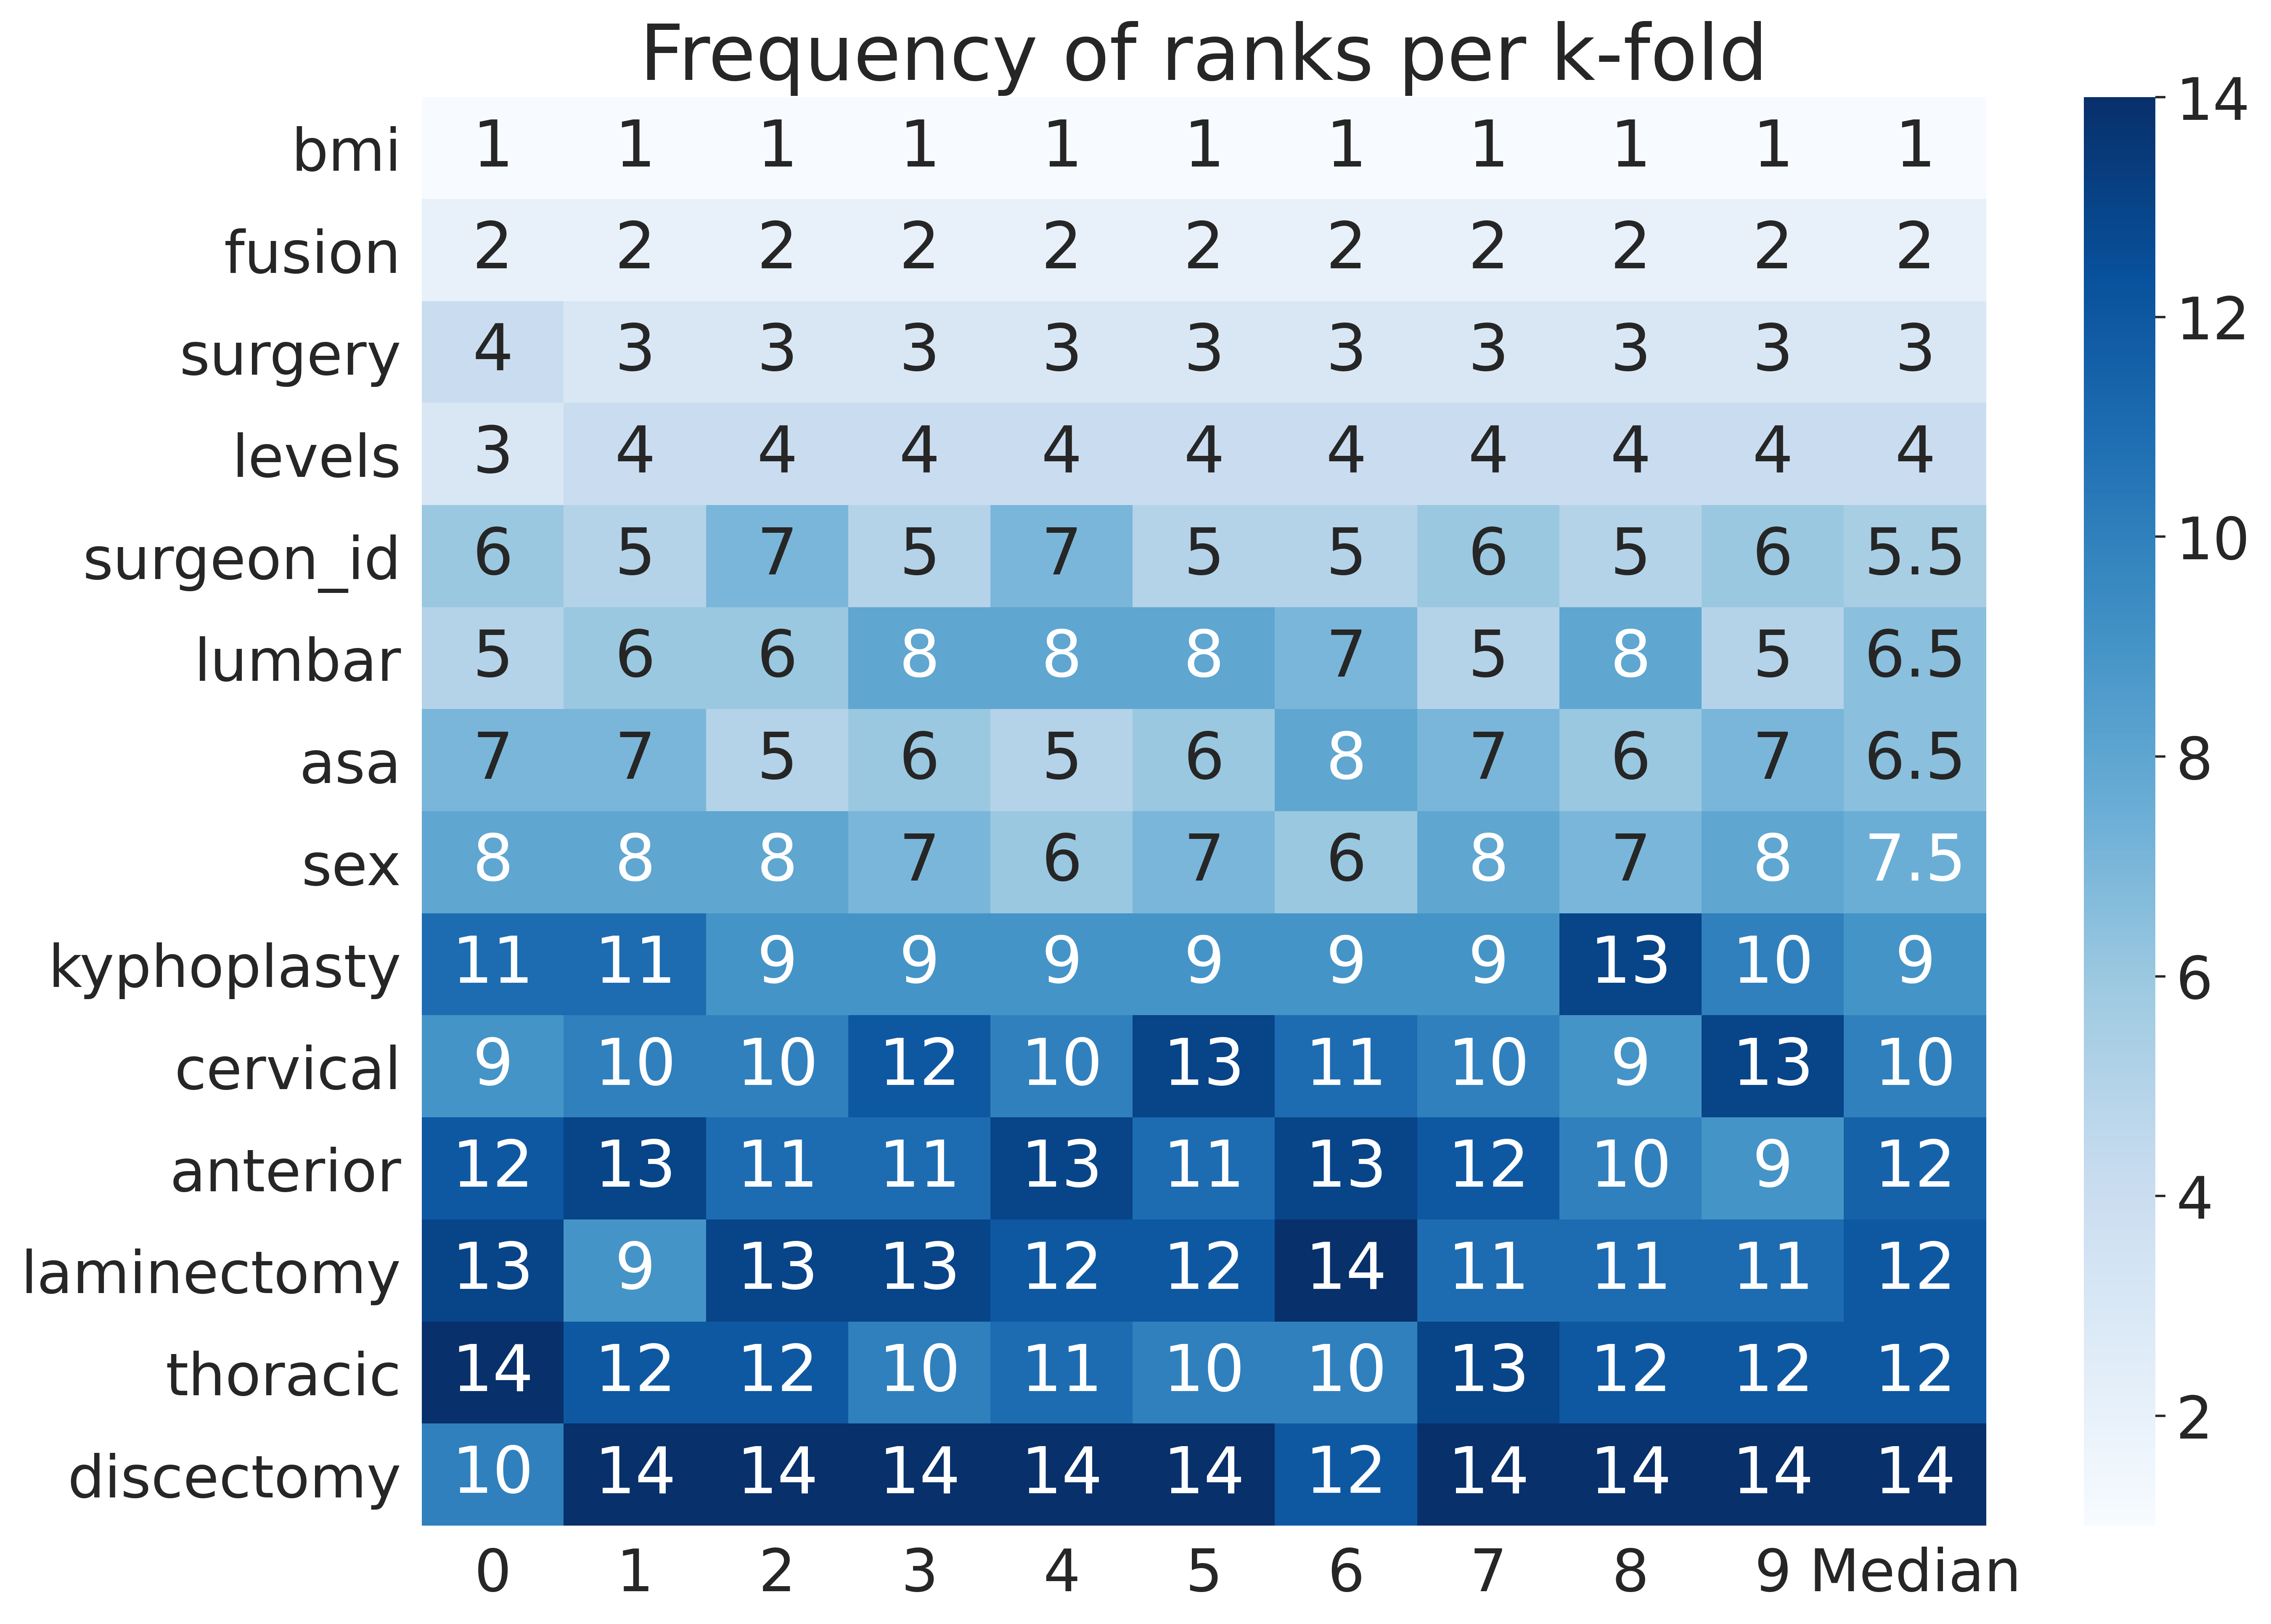

In [227]:
import matplotlib
font = {'family' : 'normal',
        # 'weight' : 'bold',
        'size'   : 22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

matplotlib.rc('font', **font)
plt.figure(figsize=(12,9), dpi=500)
sns.heatmap(dd, cmap="Blues", annot = dd)
plt.title("Frequency of ranks per k-fold")
plt.savefig("Rank_heatmap.jpg", dpi=1000, bbox_inches="tight")


In [229]:
dd["Number of Times"] = 0
dd["Label"] =0
for i in range(len(dd)):
    for j in range(10):
        k =0
        if dd.loc[dd.index[i], j] == i+1:
            k=1
        dd["Number of Times"].iloc[i] = dd["Number of Times"].iloc[i] + k
    dd["Label"].iloc[i] = dd.index[i] + " at rank " + str(i+1) 


dd


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,0,1,2,3,4,5,6,7,8,9,Median,Number of Times,Label
bmi,1,1,1,1,1,1,1,1,1,1,1.0,10,bmi at rank 1
fusion,2,2,2,2,2,2,2,2,2,2,2.0,10,fusion at rank 2
surgery,4,3,3,3,3,3,3,3,3,3,3.0,9,surgery at rank 3
levels,3,4,4,4,4,4,4,4,4,4,4.0,9,levels at rank 4
surgeon_id,6,5,7,5,7,5,5,6,5,6,5.5,5,surgeon_id at rank 5
lumbar,5,6,6,8,8,8,7,5,8,5,6.5,2,lumbar at rank 6
asa,7,7,5,6,5,6,8,7,6,7,6.5,4,asa at rank 7
sex,8,8,8,7,6,7,6,8,7,8,7.5,5,sex at rank 8
kyphoplasty,11,11,9,9,9,9,9,9,13,10,9.0,6,kyphoplasty at rank 9
cervical,9,10,10,12,10,13,11,10,9,13,10.0,4,cervical at rank 10


<AxesSubplot:xlabel='Number of Times', ylabel='Label'>

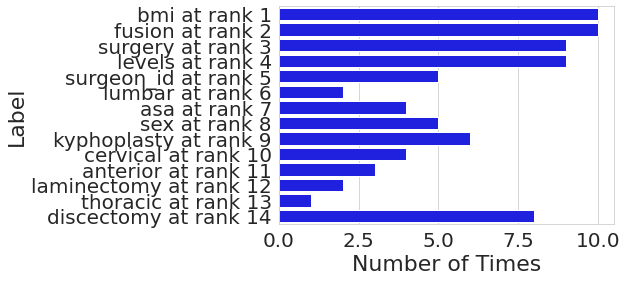

In [230]:
sns.barplot(y = dd["Label"], x = dd["Number of Times"], color="Blue"   )

In [147]:
y_test = score_dic[score_dic["Model"] == "XGBRegressor"].sort_values("r2", ascending=False).iloc[0]["y_test"].values
pred_y = score_dic[score_dic["Model"] == "XGBRegressor"].sort_values("r2", ascending=False).iloc[0]["y_pred"]
r2 = score_dic[score_dic["Model"] == "XGBRegressor"].sort_values("r2", ascending=False).iloc[0]["r2"]
# X_train = score_dic[score_dic["Model"] == "XGBRegressor"].sort_values("r2", ascending=False).iloc[0]["X_train"]
X_test =score_dic[score_dic["Model"] == "XGBRegressor"].sort_values("r2", ascending=False).iloc[0]["X_test"]

shap_values = score_dic[score_dic["Model"] == "XGBRegressor"].sort_values("r2", ascending=False).iloc[0]["Shap_Values"]

# shap.summary_plot(shap_values, X_train.columns, plot_type="bar", show=True)
# # plt.savefig("XGB Bar"+str(foldd) +".jpg", dpi=1000, bbox_inches="tight")
shap.summary_plot(shap_values, X_test, show=True)
# plt.savefig("XGB Bee"+str(foldd) +".jpg", dpi=1000, bbox_inches="tight")